In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC 

In [3]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [4]:
train_data = pd.read_csv(r'KDDTrain+.txt.zip', names= columns)
test_data = pd.read_csv(r'KDDTest+.txt.zip',names= columns)

In [5]:
train_data.head()
# test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
train_data['outcome'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [7]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [8]:
(train_data.isnull().sum() / train_data.shape[0]) * 100

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

In [9]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [10]:
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [11]:
train_data['outcome']

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: outcome, Length: 125973, dtype: object

In [12]:
train_data.loc[train_data['outcome'] != 'normal', "outcome"] = 1
train_data.loc[train_data['outcome'] == "normal", "outcome"] = 0

In [13]:
train_data['outcome']

0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: outcome, Length: 125973, dtype: object

In [14]:
test_data.loc[test_data['outcome'] != 'normal', "outcome"] = 1
test_data.loc[test_data['outcome'] == "normal", "outcome"] = 0

In [15]:
test_data['outcome']

0        1
1        1
2        0
3        1
4        1
        ..
22539    0
22540    0
22541    1
22542    0
22543    1
Name: outcome, Length: 22544, dtype: object

In [16]:
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0,21


In [17]:
train_data.select_dtypes(include=['object'])

,protocol_type,service,flag,outcome
0,tcp,ftp_data,SF,0
1,udp,other,SF,0
2,tcp,private,S0,1
3,tcp,http,SF,0
4,tcp,http,SF,0
...,...,...,...,...
125968,tcp,private,S0,1
125969,udp,private,SF,0
125970,tcp,smtp,SF,0
125971,tcp,klogin,S0,1


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [19]:
x_train = train_data.drop('outcome',axis=1)
y_train = train_data["outcome"]

x_test = test_data.drop('outcome',axis=1)
y_test = test_data["outcome"]


y_train = y_train.convert_dtypes('int64')
y_test = y_test.convert_dtypes('int64')

### Spliting

In [20]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 125973 entries, 0 to 125972
Series name: outcome
Non-Null Count   Dtype
--------------   -----
125973 non-null  Int64
dtypes: Int64(1)
memory usage: 1.1 MB


In [21]:

concatenated_df = pd.concat([x_train, x_test], ignore_index=True)

nominal_cats = ['protocol_type', 'service', 'flag']

class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, nominal_cats):
        self.nominal_cats = nominal_cats
        
        self.column_transformer = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), make_column_selector(dtype_include=['float64', 'int64'])),  # StandardScaler for numerical features
                ('nom', OneHotEncoder(), self.nominal_cats)  # OneHotEncoder for nominal features
            ])

    def fit(self, X, y=None):
        self.column_transformer.fit(X)
        return self

    def transform(self, X):
        return self.column_transformer.transform(X)

preprocessor = Preprocessor(nominal_cats)

concatenated_X_transformed = preprocessor.fit_transform(concatenated_df)

train_rows = len(x_train)
X_train_transformed = concatenated_X_transformed[:train_rows]
X_test_transformed = concatenated_X_transformed[train_rows:]

num_feat_names = make_column_selector(dtype_include=['float64', 'int64'])(concatenated_df)
nom_feat_names = preprocessor.column_transformer.transformers_[1][1].get_feature_names_out(nominal_cats)

feature_names = num_feat_names + nom_feat_names.tolist()

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)


In [52]:
svc = SVC(C=0.08, kernel='poly', gamma=0.6)
svc.fit(X_train_transformed_df, y_train)
svc.score(X_train_transformed_df, y_train)

0.9996586570138045

In [53]:
svc.score(X_test_transformed_df, y_test)

0.8557487579843861

In [54]:
svc1 = SVC(C=0.3, kernel='poly', gamma=0.6)
svc1.fit(X_train_transformed_df, y_train)
svc1.score(X_train_transformed_df, y_train)


0.9997301008946361

In [55]:
svc1.score(X_test_transformed_df, y_test)

0.8457682753726047

In [56]:
svc2 = SVC(C=0.04, kernel='poly', gamma=0.15)
svc2.fit(X_train_transformed_df, y_train)
svc2.score(X_train_transformed_df, y_train)


0.998960094623451

In [57]:
svc2.score(X_test_transformed_df, y_test)

0.8375621007806955

In [48]:
svc3 = SVC(C=0.04, kernel='linear', gamma=0.15)
svc3.fit(X_train_transformed_df, y_train)
svc3.score(X_train_transformed_df, y_train)


0.9893945528009971

In [49]:
svc3.score(X_test_transformed_df, y_test)

0.8191980127750177

In [50]:
svc4 = SVC(C=0.08, kernel='linear', gamma=0.6)
svc4.fit(X_train_transformed_df, y_train)
svc4.score(X_train_transformed_df, y_train)


0.9898787835488557

In [51]:
svc4.score(X_test_transformed_df, y_test)

0.818222143364088

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = svc.predict(X_test_transformed_df)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_pred, y_test).ravel()

In [ ]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)

In [ ]:
precision

0.7405127405906647

In [ ]:
recall

0.9662430096593798

Confusion Matrix
[[9379  332]
 [3330 9503]]


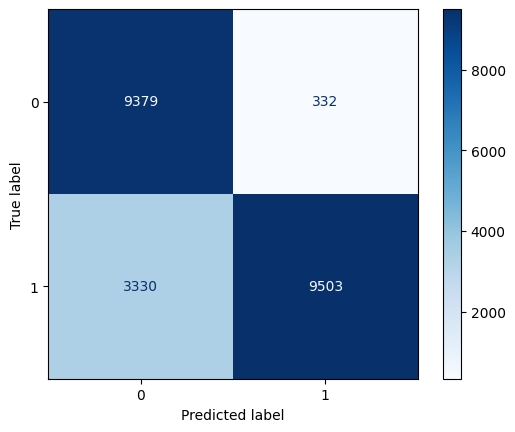

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay


np.set_printoptions(precision=2)
title = 'Confusion Matrix'

titles_options = [
    ("Confusion matrix")]

disp = ConfusionMatrixDisplay.from_estimator(svc, X_test_transformed_df, y_test, cmap=plt.cm.Blues)
print(title)
print(disp.confusion_matrix)

plt.show()

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(10 , 10), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

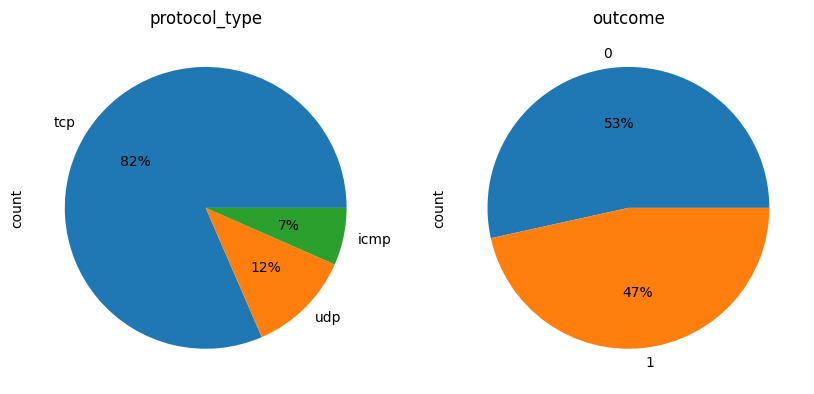

In [ ]:
pie_plot(train_data, ['protocol_type', 'outcome'], 1, 2)
